In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]



In [3]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [6]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [7]:
import os
from os import listdir
from os.path import join, isfile

import numpy as np
from PIL import Image
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

batch_size = 8

# Define the data generators
#train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1,
                                       rotation_range=20,
                                       zoom_range=0.15,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.15,
                                       horizontal_flip=True,
                                       fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the dataset and split it into train and validation sets
train_dataset = train_datagen.flow_from_directory('D:/jupyter notebook/DataSet/processed_10000_kan_sirrii_SecondGA_my/train',
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training')

valid_dataset = train_datagen.flow_from_directory('D:/jupyter notebook/DataSet/processed_10000_kan_sirrii_SecondGA_my/train',
                                                  target_size=(224, 224),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

test_dataset = test_datagen.flow_from_directory('D:/jupyter notebook/DataSet/processed_10000_kan_sirrii_SecondGA_my/test',
                                                target_size=(224, 224),
                                                batch_size=batch_size,
                                                class_mode='categorical')

# Define the class labels
class_labels = ['FMD', 'KCD', 'LD', 'RWD', 'WD']


Found 7669 images belonging to 5 classes.
Found 851 images belonging to 5 classes.
Found 2130 images belonging to 5 classes.


In [8]:
print(len(train_dataset))
print(len(valid_dataset))
print(len(test_dataset))

959
107
267


In [9]:
loss_fn = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)


In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss=loss_fn,
  optimizer=optimizer,
  metrics=['accuracy']
)

In [11]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_dataset,
  validation_data=valid_dataset,
  epochs=50,
  steps_per_epoch=len(train_dataset),
  validation_steps=len(valid_dataset)
)

Epoch 1/50
959/959 [==============================] - 359s 370ms/step - loss: 0.4382 - accuracy: 0.8686 - val_loss: 0.1055 - val_accuracy: 0.9589
Epoch 2/50
959/959 [==============================] - 351s 366ms/step - loss: 0.1744 - accuracy: 0.9475 - val_loss: 0.0744 - val_accuracy: 0.9765
Epoch 3/50
959/959 [==============================] - 349s 364ms/step - loss: 0.1468 - accuracy: 0.9564 - val_loss: 0.0912 - val_accuracy: 0.9741
Epoch 4/50
959/959 [==============================] - 355s 370ms/step - loss: 0.1140 - accuracy: 0.9656 - val_loss: 0.0657 - val_accuracy: 0.9753
Epoch 5/50
959/959 [==============================] - 348s 363ms/step - loss: 0.0914 - accuracy: 0.9703 - val_loss: 0.0826 - val_accuracy: 0.9730
Epoch 6/50
959/959 [==============================] - 348s 363ms/step - loss: 0.0868 - accuracy: 0.9748 - val_loss: 0.0552 - val_accuracy: 0.9753
Epoch 7/50
959/959 [==============================] - 348s 363ms/step - loss: 0.0895 - accuracy: 0.9733 - val_loss: 0.0659 -

In [12]:
model_history = r.history
loss_accuracy_train = model.evaluate(train_dataset)
print("Training Loss: {:.4f}".format(loss_accuracy_train[0]))
print("Training Accuracy: {:.2%}".format(loss_accuracy_train[1]))
loss_accuracy = model.evaluate(test_dataset)
print("Test Loss: {:.4f}".format(loss_accuracy[0]))
print("Testing Accuracy: {:.2%}".format(loss_accuracy[1]))

959/959 [==============================] - 323s 337ms/step - loss: 0.0275 - accuracy: 0.9906
Training Loss: 0.0275
Training Accuracy: 99.06%
267/267 [==============================] - 84s 314ms/step - loss: 0.0252 - accuracy: 0.9953
Test Loss: 0.0252
Testing Accuracy: 99.53%


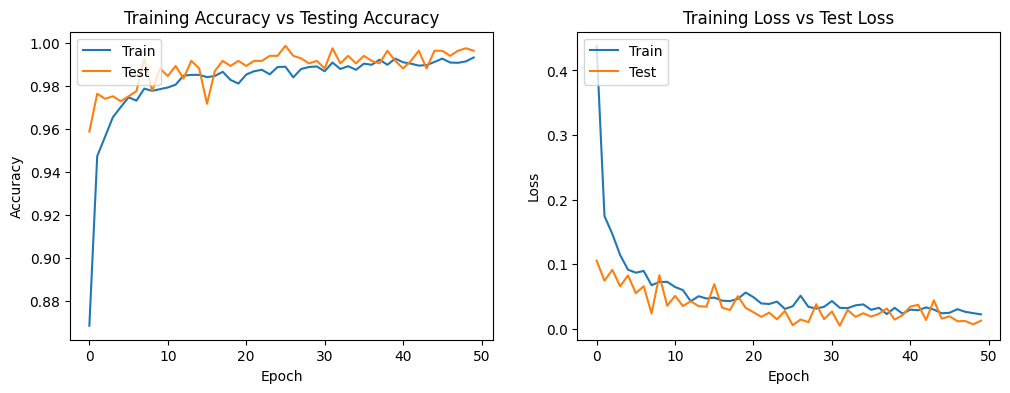

In [13]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
train_acc = r.history['accuracy']
train_loss = r.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(r.history['accuracy'])
ax[0].plot(r.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Testing Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Test'], loc='upper left')

ax[1].plot(r.history['loss'])
ax[1].plot(r.history['val_loss'])
ax[1].set_title('Training Loss vs Test Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='upper left')

plt.show()

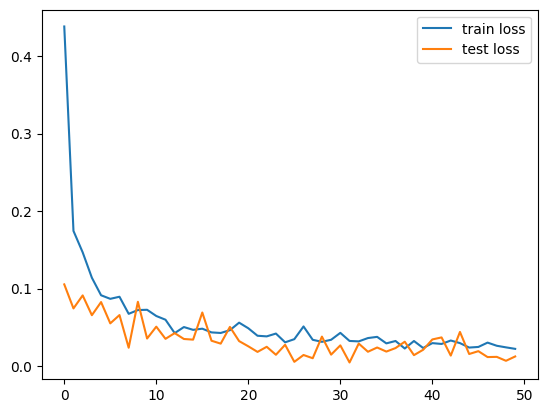

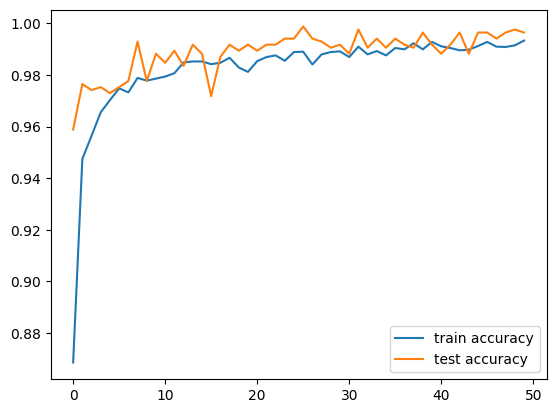

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions for the test dataset
y_pred = model.predict(test_dataset)
y_pred = np.argmax(y_pred, axis=0)

# Convert labels from one-hot encoding to integers
y_true = np.argmax(class_labels, axis=0)

# Generate and print the classification report and confusion matrix
print(classification_report(y_true, y_pred, target_names=class_labels))
print(confusion_matrix(y_true, y_pred))
